# Ⅰ. 주요 개념

# 1. 형식언어 이론상 분류

- 문맥의존 문법(Context-sensitive Grammar) : 자연어
- 문맥자유 문법(Context-free Grammar) : 프로그래밍 언어
   => 기계적으로 언어를 해석하는 파서를 만들었을 때 해석상 의미의 모호성이 생기지 않으려면, 문맥자유 문법을 따르는 언어여야 모호성이 없이 파싱트리를 만들 수 있다.

# 2. 전처리 : 자연어의 노이즈 제거
## (1) 채팅에서의 노이즈 유형
① 불완전한 문장으로 구성된 대화의 경우
② 문장의 길이가 너무 길거나 짧은 경우
③ 채팅 데이터에서 문장 시간 간격이 너무 긴 경우
④ 바람직하지 않은 문장의 사용

## (2) 영어 자연어 노이즈 유형
① 문장부호
② 대소문자
③ 특수문자

# 3. 분산표현 

## (1) 희소표현(sparse representation)
- 해당하는 위치에만 1값, 그외에는 0
- 고차원이 될 수록 희소 표현이 됨
- 단점 : 메모리와 연산량 낭비, 코사인 유사도 계산 안됨.

## (2) 코사인 유사도(cosine similarity)
- 코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도
- 두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지며, 90°의 각을 이루면 0, 180°로 반대의 방향을 가지면 -1의 값을 갖게 됨. 
- 즉, 결국 코사인 유사도는 -1 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단
- 직관적 이해 : 두 벡터가 가리키는 방향이 얼마나 유사한가를 의미

## (3) 분산 표현(distributed representation)
- 수많은 텍스트 데이터를 읽어가며 적합한 값을 찾아냄
- 적절히 훈련된 분산 표현 모델을 통해 ① 단어 간의 의미 유사도를 계산 ② 분산표현을 feature로 삼아 복잡한 자연어처리 모델을 훈련시킬 수 있음

# 04. 토큰화 

## (1) 공백 기반 토큰화
- 가장 기본적인 토큰화 방법으로, 단어 단위로 빈공간을 주는 방식이다.

## (2) 형태소 기반 토큰화
- 한국어와 같이 교착어, 조사 중심의 언어에 사용되는 토큰방식이다. 
- 형태소 : 뜻을 가진 가장 작은 말의 단위
- 종류 : KoNLPy, khaiii
- mecab : 100만 문장의 데이터를 형태소 분석할 수 있고, 속도측면에서 가장 뛰어남
- KOMORAN + (mecab, 꼬꼬마) : 시간이 걸려도 정확도가 중요한 경우 사용

## (3) 사전에 없는 단어의 문제
- OOV(Out-Of-Vaocabulary) 문제 : 토큰화하는 과정에서 한정된 단어만 취급하게 되어 \<unk>으로 처리된 단어는 의미를 상실함.

# 05. 단어의 조각들, Wordpiece Model

## (1) BPE(Byte Pair Encoding)
- 1994년 데이터 압축을 위해 고안.
  => 데이터에서 가장 많이 등장하는 바이트 쌍(byte pair)을 새로운 단어로 치환하여 압축하는 작업을 반복하는 방식
- 2015년, 토큰화에 적용하자고 제안
  => 모든 단어를 문자(바이트)들의 집합으로 취급하여 자주 등장하는 문자 쌍을 합치면,   접두어나 접미어의 의미를 캐치할 수 있고, 처음 등장하는 단어는 문자(알파벳)들의 조합으로 나타내어 OOV문제를 해결할 수 있다.
  => Embedding 레이어는 "단어의 갯수 * Embedding 차원 수"의 weight를 생성하기 때문에 단어의 갯수가 줄어드는 것은 곧 메모리의 절약으로 이어진다.

## (2) WPM(Wordpiece Model)
- 구글에서 BPE을 변형해 제안
- Multilingual 코퍼스를 바탕으로 훈련(한국어 특화 코퍼스로 훈련할 경우 더욱 성능이 향상될 가능성은 있음)
- BPE와 다른 점
   1) 공백 복원을 위해 단어의 시작 부분에 언더바_를 추가
   2) 빈도수 기반이 아닌 가능도(likeihood)를 증가시키는 방향으로 문자 쌍을 합침
      => 조사, 어미 등의 활용이 많고 복잡한 한국어 같은 모델의 토큰나이저로 WPM이 좋은 대안
      => WPM은 어떤 언어든 무관하게 적용 가능한 language-neutral하고 general한 기법.
- Katz's Back-off Model을 통해 토큰화된 사전으로부터 결합할 단어를 선정
      => LM에서 등장하지 않는 단어에 대해 확률을 할당 할 수 있는 모델 

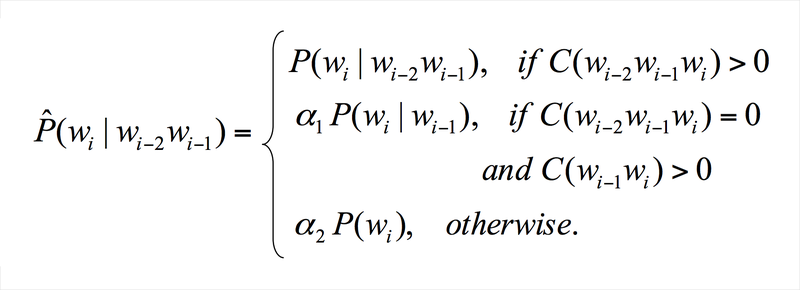
Katz's Back-off Model
 
## (3) 구글의 SentencePiece 라이브러리
- 고성능의 BPE를 사용. 전처리 과정도 포함
- SentencePiece 모델은 코퍼스데이터로부터 쉽게 추출해서 생성 가능여 유지보수에 용이함
- Subword 기반이기 때문에 새롭게 생성되는 단어에 대한 OOV(Out-Of-Vocabulary)문제에 대해서도 robust함.
- 언어에 중립적이기 때문에 여러 언어가 섞여 나오는 텍스트를 처리 가능
- 무엇보다도 특정 언어에 대한 부가지식이 없이도 엔지니어가 그 언어에 대한 작업을 손쉽게 진행할 수 있음
- 특정 언어에 특화된 토크나이저의 성능에 뒤지지 않거나 대체로 능가하는 성능

## (4) Embedding 레이어의 한계
- Embedding 레이어는 선언 즉시 랜덤한 실수로 Weight값을 채우고, 학습을 진행하며 적당한 튜닝해가는 방식으로 속성을 맞춰간다.

# 06. 토큰의 벡터화(의미부여)
- 각 토큰들이 랜덤하게 부여된 실수로 살아가지 않게, 그들끼리 유사도 연산을 할 수 있게 의미를 부여하는 알고리즘
  => Word2Vec, FastText, ELMo

## (1) Word2Vec
- 한 문장의 각 단어, 즉 동시에 등장하는 단어끼리는 연관성이 있다는 아이디어로 시작된 알고리즘.
- 딥러닝 모델은 아님
   =>은닉층이 1개로 구성되어 있으며, 이를 Shallow Neural Network이라고 한다.
- 두 가지 방식 : CBOW, Skip-gram(실험에서 우세)
- 단점 : 단어 간 연산 편차가 심함
   =>자주 등장하지 않는 단어는 최악의 경우 단 한번의 연산만 거쳐 랜덤하게 초기화된 값과 다르지 않은 상태로 알고리즘 종료될 수 있음.

## (2) FastText
- Word2Vec의 문제 해결하기 위해 BPE과 비슷한 아이디어 적용
- 한 단어를 n-gram의 집합이라고 보고, 단어를 쪼개어 각 n-gram에 할당된 Embedding의 평균값을 사용

## (3) ELMo - the 1st Contextualized Word Embedding
- Word2Vec, FastText는 고정적이라는 고질적 문제 해결 안됨
   => 고정적 : 동음이의어를 처리할 수 없음
- ELMo, 2018년 등장
- 양방향 LSTM을 활용한 ELMo모델에서 Contextual Word Embedding이 되는 벡터는, 3가지의 벡터를 합쳐서 얻어진다.
   1) 기존 어휘 임베딩(입력 토큰의 word vector)
   2) 순방향 LSTM의 hidden state vector,
   3) 역방향 LSTM의 hidden state vector
=> 위 3개 벡터를 concatenate한 벡터가 ELMo의 Contenxtual Word Embedding이 된다.

# Ⅱ. 프로세스와 주요 함수/클래스

# 1. SentencePiece 사용하기

## (1) SentencePiece 설치하기
-  Google에서 제공하는 오픈소스 기반 Sentence Tokenizer/Detokenizer
-  BPE와 unigram 2가지 subword 토크나이징 모델
- 딥러닝 자연어처리 모델의 앞부분에 사용할 목적으로 최적화

## (2) SentencePiece 모델 학습

## (3) Tokenizer함수 작성 : sp_tokenize()함수 조건
1) 매개변수로 토큰화된 문장의 list를 전달하는 대신 온전한 문장의 list 를 전달
2) 생성된 vocab 파일을 읽어와 { \<word> : \<idx> } 형태를 가지는 word_index 사전과 { \<idx> : \<word>} 형태를 가지는 index_word 사전을 생성하고 함께 반환
3) 리턴값인 tensor 는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장
   - 바로 학습에 사용할 수 있게 Padding되어야 함.

## (4) 네이버 영화리뷰 감정분석 문제에 SentencePiece 적용해 보기
1) EX07 네이버 영화리뷰 감정 분석 태스크
- 한국어로 된 corpus를 다루어야 하므로 KoNLPy에서 제공하는 형태소 분석기를 사용하여,
  텍스트 전터리해서 RNN 모델을 분류기로 사용

2) tokenizer를 SentencePiece로 바꾸어 성능비교
- 네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기
- 학습된 모델로 sp_tokenize() 메소드 구현하기
- 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델을 재학습하기
- KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기
- (보너스) SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기

# 2. 패키지의 함수/클래스 개요

## (1) Python

## (2) Numpy

## (3) Pandas

## (4) tensorflow

## (5) 기타

# Ⅲ. 코드

# 1. SentencePiece 설치하기

- SentencePiece는 Google에서 제공하는 오픈소스 기반 Sentence Tokenizer/Detokenizer 로서, BPE와 unigram 2가지 subword 토크나이징 모델 중 하나를 선택해서 사용할 수 있도록 패키징한 것입니다.
-  SentencePiece는 딥러닝 자연어처리 모델의 앞부분에 사용할 목적으로 최적화되어 있는데, 최근 pretrained model들이 거의 대부분 SentencePiece를 tokenizer로 채용하면서 사실상 표준의 역할을 하고 있다.
- SentencePiece는 python에서 쓰라고 만들어진 라이브러리는 아니지만 편리한 파이썬 wrapper를 아래와 같이 제공하고 있습니다.

In [ ]:
!pip install sentencepiece

# 2. SentencePiece 모델 학습

-  tf.keras.preprocessing.text.Tokenizer에 corpus를 주고 tokenizer.fit_on_texts(corpus)을 하면 토크나이저 내부적으로 단어사전과 토크나이저 기능을 corpus에 맞춤형으로 자동 생성해 주는 것입니다.

In [1]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

#### 데이터 다운로드
- 내려받은 데이터는 한국어의 형태소 분석과 품사 태깅, 기계 번역 연구를 위해 공개된 데이터입니다. 이번에 사용할 데이터는 한국어-영어 병렬을 이루는 말뭉치 중 한국어 부분으로, 전체 병렬 말뭉치는 후에 번역기를 만들며 사용할 예정입니다!

In [2]:
path_to_file = os.getenv('HOME')+'/aiffel/NLP/02_sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::15]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 러시아 특수 부대는 극장으로 공격해 들어가기 전에 신경 독가스를 사용했다.
>> 어휘 :
>> 65,000명에 가까운 사상자를 냈으며, 150만명 이상을 피난시켰던 19년간의 전쟁에서의 핵심적인 쟁점들을 검토하기 위해 3개 위원회를 구성하기로 합의한 후에, 양측은 태국에서의 회담이 성공적이었다고 선언했다.
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 유엔 무기 사찰관들의 복귀를 거부하라는 권고안을 이라크 의회가 만장일치로 채택한 후에, 코피 아난 유엔 사무총장은 이라크의 최종 결정을 받기를 "기대하고 있다"고 말했다.
>> 라고 미국 심장 협회 대변인인 제럴드 플레처 박사가 말했다.


In [3]:
max_len = 150
min_len = 10

# set를 사용해서 중복을 제거합니다.
cleaned_corpus = list(set(raw))  
# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# # 분포도를 다시 그려봅니다.
# sentence_length = np.zeros((max_len), dtype=np.int)

# for sen in filtered_corpus:
#     sentence_length[len(sen)-1] += 1

# plt.bar(range(max_len), sentence_length, width=1.0)
# plt.title("Sentence Length Distribution")
# plt.show()

In [4]:
def tokenize(corpus): 
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)
    
    tensor = tokenizer.texts_to_sequences(corpus)
    
    tensor = tf.keras.preprocessing.sequences.pad_sequences(tensor, padding='post')
    
    return tensor, tokenizer

### SentencePiece의 subword tokenizing model type을 기본값인 unigram

In [5]:
import sentencepiece as spm
import os

temp_file = os.getenv('HOME') + '/aiffel/NLP/02_sp_tokenizer/data/korean-english-park.train.ko.temp'
vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:
        f.write(str(row) + '\n')
        
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size) 
)
# 위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다.
# --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.
!ls -l korean_spm*

-rw-r--r-- 1 root root 376899 Dec 18 03:52 korean_spm.model
-rw-r--r-- 1 root root 146388 Dec 18 03:52 korean_spm.vocab


In [6]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1244, 11, 306, 7, 3599, 11, 286, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


### SentencePiece의 subword tokenizing model type을 BPE(Byte Pair Encoding)

In [7]:
import sentencepiece as spm
import os

temp_file = os.getenv('HOME') + '/aiffel/NLP/02_sp_tokenizer/data/korean-english-park.train.ko.temp'
vocab_size = 8000
model_type = 'bpe' 

with open(temp_file, 'w') as f:
    for row in filtered_corpus:
        f.write(str(row) + '\n')
        
# --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={} --model_type={}'.format(temp_file, vocab_size,model_type) 
)
!ls -l korean_spm*

-rw-r--r-- 1 root root 371921 Dec 18 03:53 korean_spm.model
-rw-r--r-- 1 root root 117142 Dec 18 03:53 korean_spm.vocab


In [8]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1520, 1154, 6614, 6710, 2644, 6782, 6685, 6687]
['▁아버', '지가', '방에', '들', '어가', '신', '다', '.']
아버지가방에들어가신다.


# 3. Tokenizer 함수 작성
  
### sp_tokenize() 함수
- 위에서 훈련시킨 SentencePiece를 활용하여 위 함수와 유사한 기능
- 아래 조건을 만족하는 함수를 정의하도록 하습니다.   
   1) 매개변수로 토큰화된 문장의 list를 전달하는 대신 온전한 문장의 list 를 전달합니다.  
   2) 생성된 vocab 파일을 읽어와 { \<word> : \<idx> } 형태를 가지는 word_index 사전과 { \<idx> : \<word>} 형태를 가지는 index_word 사전을 생성하고 함께 반환합니다.  
   3) 리턴값인 tensor 는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장입니다. 바로 학습에 사용할 수 있게 Padding은 당연히 해야겠죠?

In [9]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [10]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[2037 6423 6691 1610 1869 6687    0    0    0    0]
 [ 207 1977 6683    0  267 6694   87    0   60 5259]]


# Ⅲ-2. 네이버 영화평 : Sentencepiece

# 1. 환경설정

In [11]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
import sentencepiece as spm
from konlpy.tag import Mecab
from tensorflow import keras

아마 여러분들은 네이버 영화리뷰 감정분석 태스크를 한 번쯤은 다루어 보았을 것입니다. 한국어로 된 corpus를 다루어야 하므로 주로 KoNLPy에서 제공하는 형태소 분석기를 사용하여 텍스트를 전처리해서 RNN 모델을 분류기로 사용했을 것입니다.  
  
만약 이 문제에서 tokenizer를 sentencepiece로 바꾸어 다시 풀어본다면 더 성능이 좋아질까요? 비교해 보는 것도 흥미로울 것입니다.  
  
- 네이버 영화리뷰 감정분석 코퍼스에 sentencepiece를 적용시킨 모델 학습하기
- 학습된 모델로 sp_tokenize() 메소드 구현하기
- 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정분석 모델을 재학습하기
- KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기
- (보너스) SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기
- Word Vector는 활용할 필요가 없습니다. 활용이 가능하지도 않을 것입니다.
- 머지않아 SentencePiece와 BERT 등의 pretrained 모델을 함께 활용하는 태스크를 다루게 될 것입니다.

# 2. 데이터 로드

In [12]:
# $ wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt  
# $ wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

In [13]:
train_data = pd.read_table('~/aiffel/NLP/02_sp_tokenizer/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/NLP/02_sp_tokenizer/data/ratings_test.txt')

In [14]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [15]:
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [16]:
len(train_data), len(test_data)

(150000, 50000)

# 3. 데이터 전처리

## (1) 중복 및 결측치 제거

In [17]:
# 중복 제거
train_data.drop_duplicates('document', inplace=True)
test_data.drop_duplicates('document', inplace=True)

# 결측치 제거 - axis=0 Null인 행을 제거
train_data = train_data.dropna()
test_data = test_data.dropna()

In [18]:
len(train_data), len(test_data)

(146182, 49157)

## (2) 레이블 분포 확인

In [19]:
train_data.groupby('label').size()

label
0    73342
1    72840
dtype: int64

## (3) 한글/영어/공백 제외하고 모두 제거

In [20]:
train_data.head(10)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [21]:
train_data[train_data['id'] == 6483659]['document']

4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

In [22]:
# 한글, 영문, 공백 제외한 나머지 문자 공백으로 치환
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣A-Za-z ]', ' ')
test_data['document'] = test_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣A-Za-z ]', ' ')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
train_data[train_data['id'] == 5403919]['document']

5    막 걸음마 뗀  세부터 초등학교  학년생인  살용영화 ㅋㅋㅋ   별반개도 아까움 
Name: document, dtype: object

In [24]:
# 다중 공백 제거
train_data['document'] = train_data['document'].str.replace(' +', ' ')
test_data['document'] = test_data['document'].str.replace(' +', ' ')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# 중복 제거
train_data.drop_duplicates('document', inplace=True)
test_data.drop_duplicates('document', inplace=True)

# 결측치 제거 - axis=0 NaN인 행을 제거
train_data = train_data.dropna()
test_data = test_data.dropna()

In [26]:
train_data.head(10)

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화 ㅋㅋㅋ 별반개도 아까움,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지 정말 발로해도 그것보단 ...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나,1


In [27]:
len(train_data), len(test_data)

(144871, 48792)

## (4) 토큰화

### 1) Sentencepiece 모델 학습

Sentencepiece option

- input : 입력 corpus
- prefix : 저장할 모델 이름
- vocab_size : vocab 개수 (기본 8,000개에 스페셜 토큰 7개를 더해서 8,007개)
- max_sentence_length : 문장의 최대 길이
- pad_id, pad_piece : pad token id, 값
- unk_id, unk_piece : unknown token id, 값
- bos_id, bos_piece : begin of sentence token id, 값
- eos_id, eos_piece : end of sequence token id, 값
- user_defined_symblos : 사용자 정의 토큰

In [28]:
# train_data에서 텍스트 부분만 추출
tmp_file = os.getenv('HOME') + '/aiffel/NLP/02_sp_tokenizer/data/naver.csv'
train_data['document'].to_csv(tmp_file, index=False, header=False)

In [29]:
vocab_size = 8000
model_prefix = 'naver_spm'

spm.SentencePieceTrainer.Train(
    f'--input={tmp_file} --model_prefix={model_prefix} --vocab_size={vocab_size}'
)

### 2) 학습된 모델로 sp_tokenizer()함수 생성

In [30]:
def sp_tokenize(s, corpus, model_prefix):
    tensor = []
    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))
        
    with open(f'./{model_prefix}.vocab', 'r') as f:
        vocab = f.readlines()
        
    word_index = {}
    index_word = {}
    
    for idx, line in enumerate(vocab):
        word = line.split('\t')[0]
        word_index.update({idx:word})
        index_word.update({word:idx})
        
    return tensor, word_index, index_word

In [31]:
s = spm.SentencePieceProcessor()
s.Load(f'{model_prefix}.model')

X_train, word_index, index_word = sp_tokenize(s, train_data['document'], model_prefix)

In [32]:
X_train[0]

[52, 763, 24, 1911, 50, 1648]

In [33]:
X_test = [s.EncodeAsIds(x) for x in test_data['document']]

In [34]:
X_test[0]

[2668, 168]

In [35]:
len(X_train), len(X_test)

(144871, 48792)

## (5) 라벨 나눠주기

In [36]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [37]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))
y_train

144871 144871
48792 48792


array([0, 1, 0, ..., 0, 1, 0])

## (6) 샘플의 최대 길이 정하기

In [38]:
# train과 test 데이터를 한데 묶음
total_data_text = X_train + X_test
print(len(total_data_text))
# 토큰별 길이 리스트 생성
num_tokens = [len(token) for token in total_data_text]
num_tokens

193663


[6,
 12,
 10,
 11,
 29,
 18,
 8,
 43,
 8,
 20,
 11,
 22,
 21,
 26,
 21,
 8,
 34,
 16,
 25,
 16,
 19,
 7,
 54,
 8,
 5,
 19,
 15,
 5,
 3,
 11,
 23,
 9,
 6,
 11,
 6,
 9,
 18,
 8,
 8,
 8,
 9,
 30,
 13,
 14,
 37,
 8,
 55,
 27,
 4,
 73,
 22,
 24,
 12,
 25,
 1,
 2,
 1,
 42,
 2,
 6,
 8,
 10,
 11,
 39,
 17,
 57,
 31,
 17,
 10,
 21,
 6,
 59,
 1,
 10,
 4,
 29,
 10,
 2,
 21,
 6,
 13,
 5,
 18,
 4,
 3,
 4,
 3,
 4,
 10,
 13,
 5,
 15,
 4,
 11,
 2,
 13,
 2,
 8,
 7,
 15,
 22,
 9,
 8,
 11,
 5,
 20,
 1,
 4,
 6,
 13,
 10,
 17,
 6,
 1,
 24,
 2,
 10,
 5,
 13,
 4,
 41,
 25,
 12,
 4,
 1,
 8,
 6,
 17,
 48,
 14,
 2,
 8,
 4,
 18,
 11,
 7,
 16,
 4,
 21,
 19,
 2,
 13,
 49,
 2,
 7,
 8,
 41,
 21,
 12,
 56,
 8,
 1,
 15,
 3,
 3,
 6,
 33,
 16,
 7,
 1,
 11,
 17,
 4,
 52,
 70,
 16,
 4,
 19,
 11,
 4,
 38,
 57,
 10,
 5,
 5,
 23,
 4,
 4,
 13,
 11,
 52,
 6,
 38,
 8,
 20,
 2,
 5,
 7,
 49,
 8,
 5,
 17,
 22,
 26,
 16,
 19,
 6,
 16,
 12,
 36,
 9,
 13,
 15,
 69,
 16,
 14,
 17,
 4,
 19,
 7,
 2,
 7,
 9,
 18,
 3,
 18,
 14,
 11,
 17,


In [39]:
print('문장 길이 평균 : ', np.mean(num_tokens))
print('문장 길이 최대 : ', np.max(num_tokens))
print('문장 길이 최소 : ', np.min(num_tokens))
print('문장 길이 표준편차 : ', np.std(num_tokens))

문장 길이 평균 :  15.472578654673324
문장 길이 최대 :  134
문장 길이 최소 :  0
문장 길이 표준편차 :  13.515179433698462


In [40]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print(f'전체 문장의 {np.sum(num_tokens < max_tokens) / len(num_tokens)*100}%가 maxlen 설정값 이내에 포함됩니다.')

pad_sequences maxlen :  42
전체 문장의 93.72569876538111%가 maxlen 설정값 이내에 포함됩니다.


In [41]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

144871 48792
144871 48792


In [42]:
tmp_x_train, tmp_y_train = [], []

for i in range(len(X_train)):
    if 0 < len(X_train[i]) < maxlen:
        tmp_x_train.append(X_train[i])
        tmp_y_train.append(y_train[i])
        
X_train, y_train = tmp_x_train, tmp_y_train

In [43]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

135295 48792
135295 48792


## (7) 패딩 설정

In [44]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post')

In [45]:
type(X_train), type(y_train), type(X_test), type(y_test)

(numpy.ndarray, list, numpy.ndarray, numpy.ndarray)

In [46]:
y_train = np.array(y_train)

In [47]:
type(X_train), type(y_train), type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

# 4. 네이버 영화리뷰 감정분석 모델학습

## (1) 모델 구성

In [48]:
word_vector_dim = 16

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          128000    
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 128,881
Trainable params: 128,881
Non-trainable params: 0
_________________________________________________________________


## (2) 모델 학습

In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=512, validation_split=0.2, verbose=1)

Epoch 1/30
212/212 [==============================] - 6s 13ms/step - loss: 0.6831 - accuracy: 0.5300 - val_loss: 0.5000 - val_accuracy: 0.8045
Epoch 2/30
212/212 [==============================] - 2s 10ms/step - loss: 0.4403 - accuracy: 0.8267 - val_loss: 0.3729 - val_accuracy: 0.8402
Epoch 3/30
212/212 [==============================] - 2s 10ms/step - loss: 0.3369 - accuracy: 0.8638 - val_loss: 0.3576 - val_accuracy: 0.8447
Epoch 4/30
212/212 [==============================] - 2s 10ms/step - loss: 0.3138 - accuracy: 0.8714 - val_loss: 0.3555 - val_accuracy: 0.8448
Epoch 5/30
212/212 [==============================] - 2s 10ms/step - loss: 0.3030 - accuracy: 0.8760 - val_loss: 0.3527 - val_accuracy: 0.8465
Epoch 6/30
212/212 [==============================] - 2s 10ms/step - loss: 0.3009 - accuracy: 0.8761 - val_loss: 0.3575 - val_accuracy: 0.8463
Epoch 7/30
212/212 [==============================] - 2s 10ms/step - loss: 0.2875 - accuracy: 0.8831 - val_loss: 0.3540 - val_accuracy: 0.8475

## (3) 모델 테스트

In [50]:
results = model.evaluate(X_test, y_test, verbose=2)

1525/1525 - 9s - loss: 0.6536 - accuracy: 0.8155


# Ⅲ-3. 네이버 영화평 : KoNLPy 형태소 분석기

# 1 데이터 로드 및 전처리
- 앞스텝 이용

In [51]:
len(train_data), len(test_data)

(144871, 48792)

In [52]:
train_data.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


# 2. 토큰나이즈

In [53]:
mecab = Mecab()

In [54]:
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in train_data['document']:
    mecab_corpus.append(mecab_split(kor))

In [55]:
mecab_corpus[:5]

[['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍', '지', '않', '구나'],
 ['너무', '재', '밓었다그래서보는것을추천한다'],
 ['교도소', '이야기', '구먼', '솔직히', '재미', '는', '없', '다', '평점', '조정'],
 ['사이몬페그',
  '의',
  '익살',
  '스런',
  '연기',
  '가',
  '돋보였',
  '던',
  '영화',
  '스파이더맨',
  '에서',
  '늙',
  '어',
  '보이',
  '기',
  '만',
  '했',
  '던',
  '커스틴',
  '던스트',
  '가',
  '너무나',
  '도',
  '이뻐',
  '보였',
  '다']]

In [56]:
mecab_train_len_list = [len(token) for token in mecab_corpus]
mecab_test_len_list = [len(token) for token in X_test]
mecab_num_tokens = mecab_train_len_list + mecab_test_len_list
print(len(mecab_num_tokens))

193663


In [57]:
print('문장 길이 평균 : ', np.mean(mecab_num_tokens))
print('문장 길이 최대 : ', np.max(mecab_num_tokens))
print('문장 길이 최소 : ', np.min(mecab_num_tokens))
print('문장 길이 표준편차 : ', np.std(mecab_num_tokens))

문장 길이 평균 :  40.474582134945756
문장 길이 최대 :  111
문장 길이 최소 :  0
문장 길이 표준편차 :  42.682439596334106


In [58]:
mecab_max_tokens = np.mean(mecab_num_tokens) + 1.5 * np.std(mecab_num_tokens)
# mecab_max_tokens = np.mean(mecab_num_tokens) + 70
mecab_maxlen = int(mecab_max_tokens)
print('pad_sequences maxlen : ', mecab_maxlen)
print(f'전체 문장의 {np.sum(mecab_num_tokens < mecab_max_tokens) / len(mecab_num_tokens)*100}%가 maxlen 설정값 이내에 포함됩니다.')
# 길이가 111인 문장이 약 25% 정도 되어 따로 삭제하지 않고 그대로 사용한다.

pad_sequences maxlen :  104
전체 문장의 74.80571921327254%가 maxlen 설정값 이내에 포함됩니다.


In [59]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)
    
    tensor = tokenizer.texts_to_sequences(corpus)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
    
    return tensor, tokenizer

In [60]:
# 형태소 기반 토큰화를 진행한 후, 단어 사전의 길이 확인
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 51210


In [61]:
len(mecab_tensor)

144871

In [62]:
mecab_tensor[0]

array([ 35,  78, 923,  41, 227,  22,  36, 721,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0], dtype=int32)

In [63]:
tmp_x_test = mecab_tokenizer.texts_to_sequences(test_data['document'])
tmp_x_test = tf.keras.preprocessing.sequence.pad_sequences(tmp_x_test, padding='post')
tmp_x_test

array([[  809,   132,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [11053,     1,    45, ...,     0,     0,     0],
       ...,
       [  212,  1403,     0, ...,     0,     0,     0],
       [  399,    29,   301, ...,     0,     0,     0],
       [  178,     0,     0, ...,     0,     0,     0]], dtype=int32)

In [64]:
mecab_x_train = mecab_tensor
mecab_y_train = np.array(train_data['label'])
mecab_x_test = tmp_x_test
mecab_y_test = np.array(test_data['label'])

In [65]:
print(len(mecab_x_train), len(mecab_y_train))
print(len(mecab_x_test), len(mecab_y_test))

144871 144871
48792 48792


In [66]:
print(type(mecab_x_train), type(mecab_y_train))
print(type(mecab_x_test), type(mecab_y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [67]:
mecab_x_train

array([[   35,    78,   923, ...,     0,     0,     0],
       [ 1006,   500,   513, ...,     0,     0,     0],
       [   26,   204, 29147, ...,     0,     0,     0],
       ...,
       [  152,    90,   194, ...,     0,     0,     0],
       [ 1021,     3,     8, ...,     0,     0,     0],
       [  180,     3,  1890, ...,     0,     0,     0]], dtype=int32)

In [68]:
# check
ch_max = 0
for x in mecab_x_train:
    tmp = max(x)
    if tmp > ch_max:
        ch_max = tmp
print(ch_max)

51210


# 3. 모델 생성

In [69]:
# 모델 생성
word_vector_dim = 16

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(ch_max+1, word_vector_dim, input_shape=(None,)))
model2.add(keras.layers.LSTM(8))
model2.add(keras.layers.Dense(8, activation='relu'))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          819376    
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 820,257
Trainable params: 820,257
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습

In [70]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_mecab = model2.fit(mecab_x_train, mecab_y_train, epochs=30, batch_size=512, validation_split=0.2, verbose=1)

Epoch 1/30
227/227 [==============================] - 7s 21ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 2/30
227/227 [==============================] - 4s 19ms/step - loss: 0.6931 - accuracy: 0.5028 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 3/30
227/227 [==============================] - 4s 19ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 4/30
227/227 [==============================] - 4s 19ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 5/30
227/227 [==============================] - 4s 20ms/step - loss: 0.6931 - accuracy: 0.5030 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 6/30
227/227 [==============================] - 4s 19ms/step - loss: 0.6932 - accuracy: 0.4977 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 7/30
227/227 [==============================] - 4s 19ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6931 - val_accuracy: 0.5040

# 5. 모델 테스트

In [71]:
results_mecab = model2.evaluate(mecab_x_test,  mecab_y_test, verbose=2)

1525/1525 - 5s - loss: 0.6941 - accuracy: 0.5955


# Ⅳ. 결론

## 1. 결과 분석

###  SentencePiece 활용 결과 비교
- SentencePiece의 subword tokenizing model type을 기본값인 unigram인 경우 결과 : ['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
- SentencePiece의 subword tokenizing model type을 BPE(Byte Pair Encoding) 결과 : ['▁아버', '지가', '방에', '들', '어가', '신', '다', '.']
=> unigram은 되도록 한 단어 단위로 토큰화를 하는 반면 BEE 타입은 하나의 단어라도 2바이트 단위로 쪼개 토큰화한다.

###  SentencePiec vs. KoNLPy 비교(네이버 영화평)
- 동일한 30에폭으로 학습한 결과 SentencePiece를 적용한 것이 81.55%로 KoNLPy형태소(59.55%)보다 좋은 성과를 보이고 있다.

## 2. 회고 및 차후 과제

- 이론을 정리한 것에도 SentencePiece가 성능도 뛰어나고 업계 표준으로 사용되고 있음을 확인 할 수 있었다.   
- 처음 토큰화하는 방식과 벡터화 이야기가 뒤섞이는 부분들이 있어 많은 혼선이 있었다. 다른 책과 사이트 및 유튜브를 참고해봐도 여전히 혼란이 있었는데, 본 과정의 내용을 찬찬히 읽으면서 정리를 하는 가운데 나름 정리가 되었다. 벌써 진도는 seq2seq와 Attention을 들어가고 있는데 첫 귀절이 토큰과 벡터화를 정립이 된 것을 전제로 한다. 이번에 제대로 정립하고 진도를 나갈 수 있도록 해야겠다.